# Table of Contents

[0. Context](#context)<br>

[1. Import the Dataset and Explore the Data](#import-the-dataset-and-explore-the-data)<br>
Check data contents, provide descriptive statistics, and check for incoherencies in the data.<br>
Explore data visually and extract relevant insights.<br>
Explain your rationale and findings.<br>
Do not forget to analyze multivariate relationships.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.1 Importing Libraries](#11-importing-libraries)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.2 Loading and Reading the Dataset](#12-loading-and-reading-the-dataset)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.3 Descriptive Statistics](#13-descriptive-statistics)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.4 Incoherencies](#14-incoherencies)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.5 Exploring Data Visually](#15-exploring-data-visually)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[1.6 Pair-wise Relationships](#16-pair-wise-relationships)<br>

[2. Clean and Pre-process the Data](#clean-and-pre-process-the-data)<br>
Are there any missing values? Take action to handle them.<br>
Check the dataset for outliers and pre-process them. Justify your decisions.<br>
Deal with categorical variables.<br>
Review current features and create extra features if needed. Explain your steps.<br>
Perform data scaling. Explain the reasoning behind your choices.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.1 Missing Values](#21-missing-values)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.2 Duplicates](#22-duplicates)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.3 Outliers](#23-outliers)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.4 Categorical Data](#24-categorical-data)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.5 Aggregations](#25-aggregations)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.6 Feature Engineering](#26-feature-engineering)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.7 Multivariate Relationships](#27-multivariate-relationships)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[2.8 Data Scaling](#28-data-scaling)<br>

[3. Feature Selection](#feature-selection)<br>
Define and implement an unambiguous strategy for feature selection.<br>
Use methods discussed in the course.<br>
Present and justify your final selection.<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.1 Filter Methods](#31-filter-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.1 Univariate Variables](#311-univariate-variables)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.2 Correlation Indices](#312-correlation-indices)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;[3.1.3 Chi-Square](#313-chi-square)<br>
&nbsp;&nbsp;&nbsp;&nbsp;[3.2 Wrapper Methods](#32-wrapper-methods)<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;

# 0. Context <a name="0-context"></a>

The New York Workers’ Compensation Board (WCB) administers and regulates workers’ compensation, disability, and other workers’ benefits. <br>
**WCB is responsible for assembling and deciding on claims whenever it becomes aware of a workplace injury**. Since 2000, the WCB has assembled and reviewed more than 5 million claims. However, manually reviewing all claims is an arduous and time-consuming process. For that reason, the WCB has reached out to Nova IMS to assist them in the creation of a model that can automate the decision-making whenever a new claim is received. <br>

Our task is to **create a classification model that can accurately predict the WCB’s final decision on what type o 
injury (Claim Injury Type) should be given to a caim.l To do that, the
WCB has provided labelled data with all claims assembled between
2020 and 2022 <br>

# Import the Dataset and Explore the Data <a name="import-the-dataset-and-explore-the-data"></a>

## 1.1 Importing Libraries <a name="11-importing-libraries"></a>

In [110]:
pip install kmodes

Note: you may need to restart the kernel to use updated packages.


In [111]:
# Remember: library imports are ALWAYS at the top of the script, no exceptions!
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from kmodes.kmodes import KModes
from math import ceil
from sklearn.metrics import silhouette_score

# for better resolution plots
%config InlineBackend.figure_format = 'retina' # optionally, you can change 'svg' to 'retina'

# Seeting seaborn style
sns.set()

## 1.2 Loading and Reading the Dataset <a name="12-loading-and-reading-the-dataset"></a>

In [112]:
wcb = pd.read_csv('train_data.csv', sep = ',', low_memory=False)   #sep is good to seperate data
pd.set_option('display.max_columns', None) #to be able too see all columns
wcb.head(5)

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
0,2019-12-30,31.0,N,2020-01-01,N,0.00,1988.0,2019-12-31,NaN,NEW HAMPSHIRE INSURANCE CO,1A. PRIVATE,5393875,2. NON-COMP,ST. LAWRENCE,N,SYRACUSE,NaN,M,NaN,44.0,RETAIL TRADE,I,NaN,27.0,FROM LIQUID OR GREASE SPILLS,10.0,CONTUSION,62.0,BUTTOCKS,13662,0.0,Not Work Related,1.0
1,2019-08-30,46.0,N,2020-01-01,Y,1745.93,1973.0,2020-01-01,2020-01-14,ZURICH AMERICAN INSURANCE CO,1A. PRIVATE,5393091,4. TEMPORARY,WYOMING,N,ROCHESTER,2020-02-21,F,4.0,23.0,CONSTRUCTION,I,NaN,97.0,REPETITIVE MOTION,49.0,SPRAIN OR TEAR,38.0,SHOULDER(S),14569,1.0,Not Work Related,4.0
2,2019-12-06,40.0,N,2020-01-01,N,1434.80,1979.0,2020-01-01,NaN,INDEMNITY INSURANCE CO OF,1A. PRIVATE,5393889,4. TEMPORARY,ORANGE,N,ALBANY,NaN,M,NaN,56.0,ADMINISTRATIVE AND SUPPORT AND WASTE MANAGEMEN...,II,NaN,79.0,OBJECT BEING LIFTED OR HANDLED,7.0,CONCUSSION,10.0,MULTIPLE HEAD INJURY,12589,0.0,Not Work Related,6.0
3,NaN,NaN,NaN,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,957648180,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-12-30,61.0,N,2020-01-01,N,NaN,1958.0,2019-12-31,NaN,STATE INSURANCE FUND,2A. SIF,5393887,2. NON-COMP,DUTCHESS,N,ALBANY,NaN,M,NaN,62.0,HEALTH CARE AND SOCIAL ASSISTANCE,II,NaN,16.0,"HAND TOOL, UTENSIL; NOT POWERED",43.0,PUNCTURE,36.0,FINGER(S),12603,0.0,Not Work Related,1.0


### Metadata

**Claim Dates**  
`Accident Date` Injury date of the claim.  
`Assembly Date` The date the claim was first assembled.  
`C-2 Date` Date of receipt of the Employer's Report of Work-Related Injury/Illness or equivalent (formerly Form C-2).  
`C-3 Date` Date Form C-3 (Employee Claim Form) was received.  
`First Hearing Date` Date the first hearing was held on a claim at a WCB hearing location. A blank date means the claim has not yet had a hearing held.  

**Worker Demographics**  
`Age at Injury` Age of injured worker when the injury occurred.  
`Birth Year` The reported year of birth of the injured worker.  
`Gender` The reported gender of the injured worker.  
`Zip Code` The reported ZIP code of the injured worker’s home address.  

**Claim and Case Information**  
`Alternative Dispute Resolution` Adjudication processes external to the Board.  
`Attorney/Representative` Is the claim being represented by an Attorney?  
`Claim Identifier` Unique identifier for each claim, assigned by WCB.  
`Carrier Name` Name of primary insurance provider responsible for providing workers’ compensation coverage to the injured worker’s employer.  
`Carrier Type` Type of primary insurance provider responsible for providing workers’ compensation coverage.  
`Average Weekly Wage` The wage used to calculate workers’ compensation, disability, or paid leave wage replacement benefits.  

**Location and Region**  
`County of Injury` Name of the New York County where the injury occurred.  
`District Name` Name of the WCB district office that oversees claims for that region or area of the state.  
`Medical Fee Region` Approximate region where the injured worker would receive medical service.  

**Incident and Injury Details**  
`COVID-19 Indicator` Indication that the claim may be associated with COVID-19.  
`IME-4 Count` Number of IME-4 forms received per claim. The IME-4 form is the “Independent Examiner's Report of Independent Medical Examination” form.  

**Industry Classification**  
`Industry Code` NAICS code and descriptions are available at https://www.naics.com/search-naics-codes-by-industry/.  
`Industry Code Description` 2-digit NAICS industry code description used to classify businesses according to their economic activity.  

**Injury Descriptions and Codes**  
`OIICS Nature of Injury Description` The OIICS nature of injury codes & descriptions are available at https://www.bls.gov/iif/oiics_manual_2007.pdf.  
`WCIO Cause of Injury Code` The WCIO cause of injury codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Cause_Table.pdf.  
`WCIO Cause of Injury Description` See description of field above.  
`WCIO Nature of Injury Code` The WCIO nature of injury codes are available at https://www.wcio.org/Active%20PNC/WCIO_Nature_Table.pdf.  
`WCIO Nature of Injury Description` See description of field above.  
`WCIO Part Of Body Code` The WCIO part of body codes & descriptions are available at https://www.wcio.org/Active%20PNC/WCIO_Part_Table.pdf.  
`WCIO Part Of Body Description` See description of field above.  

**Claim Outcomes**  
`Agreement Reached` Binary variable: Yes if there is an agreement without the involvement of the WCB; otherwise unknown at the start of a claim.  
`WCB Decision` Multiclass variable: Decision of the WCB relative to the claim; "Accident" indicates a workplace accident, and "Occupational Disease" indicates illness from the workplace, both of which require WCB deliberation and may be unknown at the claim's start.  
`Claim Injury Type` Main target variable: Deliberation of the WCB relative to benefits awarded to the claim, with numbering indicating severity.  
aim, with numbering indicating severity. <br>  

## 1.3 Descriptive Statistics <a name="13-descriptive-statistics"></a>

#### Shape

In [113]:
wcb.shape

(593471, 33)

In [114]:
wcb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593471 entries, 0 to 593470
Data columns (total 33 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Identifier          

### Any footnotes?

In [115]:
wcb.tail(5)
# No, there isn't any

,Accident Date,Age at Injury,Alternative Dispute Resolution,Assembly Date,Attorney/Representative,Average Weekly Wage,Birth Year,C-2 Date,C-3 Date,Carrier Name,Carrier Type,Claim Identifier,Claim Injury Type,County of Injury,COVID-19 Indicator,District Name,First Hearing Date,Gender,IME-4 Count,Industry Code,Industry Code Description,Medical Fee Region,OIICS Nature of Injury Description,WCIO Cause of Injury Code,WCIO Cause of Injury Description,WCIO Nature of Injury Code,WCIO Nature of Injury Description,WCIO Part Of Body Code,WCIO Part Of Body Description,Zip Code,Agreement Reached,WCB Decision,Number of Dependents
593466,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327160035,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593467,2022-12-13,72.0,N,2022-12-31,N,0.0,1950.0,2022-12-31,NaN,TECHNOLOGY INSURANCE CO. INC.,1A. PRIVATE,6165075,2. NON-COMP,SULLIVAN,N,BINGHAMTON,NaN,F,NaN,48.0,TRANSPORTATION AND WAREHOUSING,I,NaN,25.0,FROM DIFFERENT LEVEL (ELEVATION),90.0,MULTIPLE PHYSICAL INJURIES ONLY,-9.0,MULTIPLE,12779,0.0,Not Work Related,3.0
593468,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,249875936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593469,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,120584215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
593470,NaN,NaN,NaN,2022-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,818961390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
wcb.describe(include='object').T

,count,unique,top,freq
Accident Date,570337,5539,2020-03-01,1245
Alternative Dispute Resolution,574026,3,N,571412
Assembly Date,593471,1096,2020-03-06,1422
Attorney/Representative,574026,2,N,392291
C-2 Date,559466,2475,2021-05-11,1847
C-3 Date,187245,1648,2021-04-21,350
Carrier Name,574026,2046,STATE INSURANCE FUND,111144
Carrier Type,574026,8,1A. PRIVATE,285368
Claim Injury Type,574026,8,2. NON-COMP,291078
County of Injury,574026,63,SUFFOLK,60430


In [117]:
wcb.describe(include='number').T

,count,mean,std,min,25%,50%,75%,max
Age at Injury,574026.0,4.211427e+01,1.425643e+01,0.0,31.0,42.0,54.0,117.0
Average Weekly Wage,545375.0,4.910883e+02,6.092918e+03,0.0,0.0,0.0,841.0,2828079.0
Birth Year,544948.0,1.886768e+03,4.146444e+02,0.0,1965.0,1977.0,1989.0,2018.0
Claim Identifier,593471.0,2.366760e+07,1.079271e+08,5393066.0,5593414.5,5791212.0,5991000.5,999891667.0
IME-4 Count,132803.0,3.207337e+00,2.832303e+00,1.0,1.0,2.0,4.0,73.0
Industry Code,564068.0,5.864531e+01,1.964417e+01,11.0,45.0,61.0,71.0,92.0
OIICS Nature of Injury Description,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WCIO Cause of Injury Code,558386.0,5.438114e+01,2.587428e+01,1.0,31.0,56.0,75.0,99.0
WCIO Nature of Injury Code,558369.0,4.101384e+01,2.220752e+01,1.0,16.0,49.0,52.0,91.0
WCIO Part Of Body Code,556944.0,3.973815e+01,2.236594e+01,-9.0,33.0,38.0,53.0,99.0


## 1.4 Incoherencies <a name="14-incoherencies"></a>

In [118]:
wcb.dtypes

Accident Date                          object
Age at Injury                         float64
Alternative Dispute Resolution         object
Assembly Date                          object
Attorney/Representative                object
Average Weekly Wage                   float64
Birth Year                            float64
C-2 Date                               object
C-3 Date                               object
Carrier Name                           object
Carrier Type                           object
Claim Identifier                        int64
Claim Injury Type                      object
County of Injury                       object
COVID-19 Indicator                     object
District Name                          object
First Hearing Date                     object
Gender                                 object
IME-4 Count                           float64
Industry Code                         float64
Industry Code Description              object
Medical Fee Region                

### Datatypes:

**Numerical Data: <br>
float -> int** <br>
`Age at Injury` <br>
`Birth Year` <br>
`IME-4 Count`  <br>
`Number of Dependents` <br>
`WCIO Cause of Injury Code` <br>
`WCIO Nature of Injury Code` <br>
`WCIO Part Of Body Code` <br>
`Industry Code` <br>


**Object -> Dates** <br>
`C-2 Date` <br>
`C-3 Date` <br>
`First Hearing Date` <br>
`Accident Date`  <br>
`Assembly Dates` <br>

### Change in datatypes

**Numeric data from float to integer:**

In [119]:
wcb_float_to_int = ['Age at Injury', 'Birth Year', 'IME-4 Count', 'Number of Dependents', 'WCIO Cause of Injury Code',
                    'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Industry Code']

for col in wcb_float_to_int:
    # Convert the column to numeric, then to Int64 (nullable integer type)
    wcb[col] = pd.to_numeric(wcb[col], errors='coerce').astype('Int64')

**Dates from object to datetime format:**

In [120]:
# Convert dates treated as objects to datetime format
wcb['C-2 Date'] = pd.to_datetime(wcb['C-2 Date'], errors='coerce')
wcb['C-3 Date'] = pd.to_datetime(wcb['C-3 Date'], errors='coerce')
wcb['Accident Date'] = pd.to_datetime(wcb['Accident Date'], errors='coerce')
wcb['First Hearing Date'] = pd.to_datetime(wcb['First Hearing Date'], errors='coerce')
wcb['Assembly Date'] = pd.to_datetime(wcb['Assembly Date'], errors='coerce')

In [121]:
wcb['Gender'] = wcb['Gender'].replace('U', np.nan)

In [122]:
wcb.dtypes

Accident Date                         datetime64[ns]
Age at Injury                                  Int64
Alternative Dispute Resolution                object
Assembly Date                         datetime64[ns]
Attorney/Representative                       object
Average Weekly Wage                          float64
Birth Year                                     Int64
C-2 Date                              datetime64[ns]
C-3 Date                              datetime64[ns]
Carrier Name                                  object
Carrier Type                                  object
Claim Identifier                               int64
Claim Injury Type                             object
County of Injury                              object
COVID-19 Indicator                            object
District Name                                 object
First Hearing Date                    datetime64[ns]
Gender                                        object
IME-4 Count                                   

# CLAIM IDENTIFIER REPEATS ONE VALUE

## 1.5 Exploring Data Visually <a name="15-exploring-data-visually"></a>

### Numerical Data Visualization

In [123]:
# Supondo que o dataset wcb já está carregado no ambiente de trabalho
# Identifica colunas categóricas
categorical_columns = wcb.select_dtypes(include='number').columns

# Calcula a variância das frequências para cada coluna categórica
variance_results = {}

for col in categorical_columns:
    frequencies = wcb[col].value_counts()  # Conta a frequência de cada categoria
    variance_results[col] = frequencies.var()  # Calcula a variância das frequências

# Converte o dicionário de resultados para um DataFrame para visualização
variance_df = pd.DataFrame(variance_results.items(), columns=["Variable", "Variance"])

# Mostra o resultado
print(variance_df)


                              Variable      Variance
0                        Age at Injury  3.298547e+07
1                  Average Weekly Wage  9.377458e+05
2                           Birth Year  3.102951e+07
3                     Claim Identifier  1.685005e-06
4                          IME-4 Count  7.381624e+07
5                        Industry Code  7.677068e+08
6   OIICS Nature of Injury Description           NaN
7            WCIO Cause of Injury Code  9.510269e+07
8           WCIO Nature of Injury Code  7.078313e+08
9               WCIO Part Of Body Code  1.581468e+08
10                   Agreement Reached  1.354351e+11
11                Number of Dependents  1.380929e+05


Since the variable `Claim Identifier` doesn't have any variance we think it won't the helpful for the development of the model, therefore we think it should be dropped.

### Categorical Data Visualization

In [124]:

# Supondo que o dataset wcb já está carregado no ambiente de trabalho
# Identifica colunas categóricas
categorical_columns = wcb.select_dtypes(include='object').columns

# Calcula a variância das frequências para cada coluna categórica
variance_results = {}

for col in categorical_columns:
    frequencies = wcb[col].value_counts()  # Conta a frequência de cada categoria
    variance_results[col] = frequencies.var()  # Calcula a variância das frequências

# Converte o dicionário de resultados para um DataFrame para visualização
variance_df = pd.DataFrame(variance_results.items(), columns=["Variable", "Variance"])

# Mostra o resultado
print(variance_df)


                             Variable      Variance
0      Alternative Dispute Resolution  1.083416e+11
1             Attorney/Representative  2.216691e+10
2                        Carrier Name  7.315897e+06
3                        Carrier Type  1.003642e+10
4                   Claim Injury Type  1.040645e+10
5                    County of Injury  2.074888e+08
6                  COVID-19 Indicator  1.346722e+11
7                       District Name  7.060876e+09
8                              Gender  2.955556e+10
9           Industry Code Description  9.873992e+08
10                 Medical Fee Region  8.634815e+09
11   WCIO Cause of Injury Description  1.021386e+08
12  WCIO Nature of Injury Description  7.078313e+08
13      WCIO Part Of Body Description  1.645646e+08
14                           Zip Code  5.890209e+04
15                       WCB Decision           NaN


Since the variable `WCB Decision` doesn't have any variance we think it won't the helpful for the development of the model, therefore we think it should be dropped.

## 1.6 Pair-wise Relationships <a name="16-pair-wise-relationships"></a>

# 2. Clean and Pre-process the Data <a name="2-clean-and-pre-process-the-data"></a>

WCB has provided labelled data with all claims assembled between 2020 and 2022

In [125]:
wcb.shape

(593471, 33)

## 2.1 Missing Values <a name="21-missing-values"></a>

`Step 1` **Disposable rows and columns**

Check for % non-null values for each feature:

In [126]:
# Calculate the non-null percentage and null counts
non_null_percentage = wcb.notna().mean() * 100
null_counts = wcb.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': wcb.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
3,Assembly Date,100.000000,0
11,Claim Identifier,100.000000,0
32,Number of Dependents,96.723513,19445
15,District Name,96.723513,19445
2,Alternative Dispute Resolution,96.723513,19445
4,Attorney/Representative,96.723513,19445
31,WCB Decision,96.723513,19445
30,Agreement Reached,96.723513,19445
21,Medical Fee Region,96.723513,19445
1,Age at Injury,96.723513,19445


**Drop column with all null values:**

In [127]:
wcb.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

Check how many rows with missing values there are throughout all dataset columns: <br>
*Excluding 'Assembly Date' and 'Claim Identifier', which have values for every row but aren't relevant enough to keep if all others are NaN*

In [128]:
# Exclude columns 'Assembly Date' and 'Claim Identifier'
nan_columns = wcb.columns.drop(['Assembly Date', 'Claim Identifier'])

# Count how many rows have all NaN values in the selected columns
((wcb[nan_columns].isnull()) | (wcb[nan_columns] == 0)).all(axis=1).sum()


19445

**Drop rows with all NaN values, identified in previous step for the selected columns (all but 2):**

In [129]:
wcb = wcb.dropna(subset = nan_columns, how = 'all')

In [130]:
wcb.shape
# Calculate the non-null percentage and null counts
non_null_percentage = wcb.notna().mean() * 100
null_counts = wcb.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': wcb.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
31,Number of Dependents,100.000000,0
15,District Name,100.000000,0
2,Alternative Dispute Resolution,100.000000,0
3,Assembly Date,100.000000,0
4,Attorney/Representative,100.000000,0
30,WCB Decision,100.000000,0
29,Agreement Reached,100.000000,0
21,Medical Fee Region,100.000000,0
1,Age at Injury,100.000000,0
9,Carrier Name,100.000000,0


In [131]:
wcb.shape

(574026, 32)

In summary: <br>
We **treated missing values for a total of 15 features** with this operation.

**Columns to drop** = 1, `OIICS Nature of Injury Description` <br>
**Rows to drop in total** = 19445 <br>

By removing all null rows (except for `Assembly Date` and `Claim Identifier`) all the null values of the target variable `Claim Injury Type` are also removed, not needing another step to delete them.

**Turn 'C-3 Date' into a binary outcome feature, where 0  "no form received" and 1 = "at least 1 form received"**

In [132]:
wcb['C-3 Date'] = wcb['C-3 Date'].apply(lambda x: 0 if pd.isna(x) else 1)

**Turn 'First Hearing Date' into a binary outcome feature, where 0 = "there was no hearing" and 1 = "there was a hearing"**

In [133]:
wcb['First Hearing Date'] = wcb['First Hearing Date'].apply(lambda x: 0 if pd.isna(x) else 1)

**Change in 'IME-4 Count' null values**

Since `IME-4 Count` has only integers different from 0, we are assuming that all null values mean that an independent medical evaluation wasn't requested, therefore all null values will be changed to 0's.

In [134]:
wcb['IME-4 Count'] = wcb['IME-4 Count'].fillna(0)
wcb['IME-4 Count'].value_counts()
wcb['IME-4 Count'].quantile(0.5)

0.0

In [135]:
# Calculate the non-null percentage and null counts
non_null_percentage = wcb.notna().mean() * 100
null_counts = wcb.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': wcb.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)

,Variable,Non-Null Percentage,Null Values
16,First Hearing Date,100.000000,0
11,Claim Identifier,100.000000,0
30,WCB Decision,100.000000,0
29,Agreement Reached,100.000000,0
21,Medical Fee Region,100.000000,0
18,IME-4 Count,100.000000,0
1,Age at Injury,100.000000,0
15,District Name,100.000000,0
14,COVID-19 Indicator,100.000000,0
13,County of Injury,100.000000,0


In [136]:
X = (wcb['Assembly Date'] - wcb['Accident Date']).dt.days
X.describe()

count    570337.000000
mean         82.227483
std         603.986690
min       -1127.000000
25%           5.000000
50%          10.000000
75%          24.000000
max       21503.000000
dtype: float64

In [137]:
wcb['Accident Date'] = wcb.apply(lambda x: x['Assembly Date'] - pd.Timedelta(days=10) if pd.isna(x['Accident Date']) else x['Accident Date'], axis=1)

In [138]:
wcb['Accident Date'].describe()

count                           574026
mean     2021-04-29 00:42:26.878363904
min                1961-09-06 00:00:00
25%                2020-09-14 00:00:00
50%                2021-06-27 00:00:00
75%                2022-03-21 00:00:00
max                2023-09-29 00:00:00
Name: Accident Date, dtype: object

**Most of the `Birth Year` values can be calculated by subtracting `Accident Date` with `Age at Injury`, since `Accident Date` still has some null values**

In [139]:
wcb['Birth Year'] = wcb['Birth Year'].fillna(wcb['Accident Date'].dt.year - wcb['Age at Injury'])

In [140]:
wcb['Birth Year'].describe()

count      574026.0
mean       1891.422
std      404.520748
min             0.0
25%          1965.0
50%          1977.0
75%          1989.0
max          2022.0
Name: Birth Year, dtype: Float64

**Since the median value of `Average Weekly Wage` is 0, and more than half of the values of this variable are also 0, we think that replacing null values with the median is the most correct approach** <br>
In this case, the mean is a reasonable value considering the real world conditions, however the values range from 0 to 2.8 milion, reducing the credibility of the mean

In [141]:
Y = (wcb['Assembly Date'] - wcb['C-2 Date']).dt.days
Y.describe()

count    559466.000000
mean          3.874555
std         259.318242
min       -1466.000000
25%           0.000000
50%           0.000000
75%           0.000000
max        9664.000000
dtype: float64

In [142]:
wcb['Average Weekly Wage'] = wcb['Average Weekly Wage'].fillna(0)

**Since the median value of the diference between `Assembly Date` and `C-2 Date` is 0 days and the mean is 4 days, we believe that the best approach is to fill the null values of the `C-2 Date` equal to the values in `Assembly Date`** <br>
We choose `Assembly Date` to replace the null values because these two variables have high correlation between them (we show this foward in the code)

In [143]:
Z = (wcb['Assembly Date'] - wcb['Accident Date']).dt.days
Z.describe()

count    574026.000000
mean         81.763310
std         602.070451
min       -1127.000000
25%           5.000000
50%          10.000000
75%          24.000000
max       21503.000000
dtype: float64

In [144]:
wcb['C-2 Date'] = wcb.apply(lambda x: x['Assembly Date'] if pd.isna(x['C-2 Date']) else x['C-2 Date'], axis=1)

# REVER SE QUEREMOS DAR DROP A ISTO TUDO

In [145]:
wcb = wcb.dropna(subset=['WCIO Part Of Body Description'])
wcb = wcb.dropna(subset=['WCIO Cause of Injury Description'])
wcb = wcb.dropna(subset=['WCIO Nature of Injury Description'])
wcb = wcb.dropna(subset=['Industry Code'])

**Transform the variable `Gender` into numeric where 0 is Male, 1 is Female and 2 is Non-Binary, with the handling of the null values with the mode, which is male in this case**

In [146]:
wcb['Gender'] = wcb['Gender'].fillna(0)

wcb['Gender'] = wcb['Gender'].replace({'M': 0, 'F': 1, 'X': 2}).astype('Int64')

C:\Users\mainj\AppData\Local\Temp\ipykernel_11152\2239886594.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wcb['Gender'] = wcb['Gender'].replace({'M': 0, 'F': 1, 'X': 2}).astype('Int64')


In [147]:
wcb['Zip Code'] = wcb['Zip Code'].fillna('Unknown')

In [148]:
# Calculate the non-null percentage and null counts
non_null_percentage = wcb.notna().mean() * 100
null_counts = wcb.isna().sum()

# Convert to a DataFrame for better display
non_null_df = pd.DataFrame({
    'Variable': wcb.columns,
    'Non-Null Percentage': non_null_percentage.values,
    'Null Values': null_counts.values,})

# Sort the DataFrame by Non-Null Percentage
non_null_df.sort_values('Non-Null Percentage', ascending=False)    

,Variable,Non-Null Percentage,Null Values
0,Accident Date,100.0,0
1,Age at Injury,100.0,0
30,WCB Decision,100.0,0
29,Agreement Reached,100.0,0
28,Zip Code,100.0,0
27,WCIO Part Of Body Description,100.0,0
26,WCIO Part Of Body Code,100.0,0
25,WCIO Nature of Injury Description,100.0,0
24,WCIO Nature of Injury Code,100.0,0
23,WCIO Cause of Injury Description,100.0,0


In [149]:
wcb.shape

(555016, 32)

In [150]:
wcb['Carrier Type'] = wcb['Carrier Type'].replace({
    '1A. PRIVATE': 1,
    '2A. SIF': 2,
    '3A. SELF PUBLIC': 3,
    '4A. SELF PRIVATE': 4,
    '5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 5,
    '5C. SPECIAL FUND - POI CARRIER WCB MENANDS': 5,
    '5D. SPECIAL FUND - UNKNOWN': 5,
    'UNKNOWN': 0
}).astype('Int64')
wcb['Carrier Type'].value_counts()

C:\Users\mainj\AppData\Local\Temp\ipykernel_11152\663654537.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  wcb['Carrier Type'] = wcb['Carrier Type'].replace({


Carrier Type
1    278621
3    118577
2    108872
4     47952
5       658
0       336
Name: count, dtype: Int64

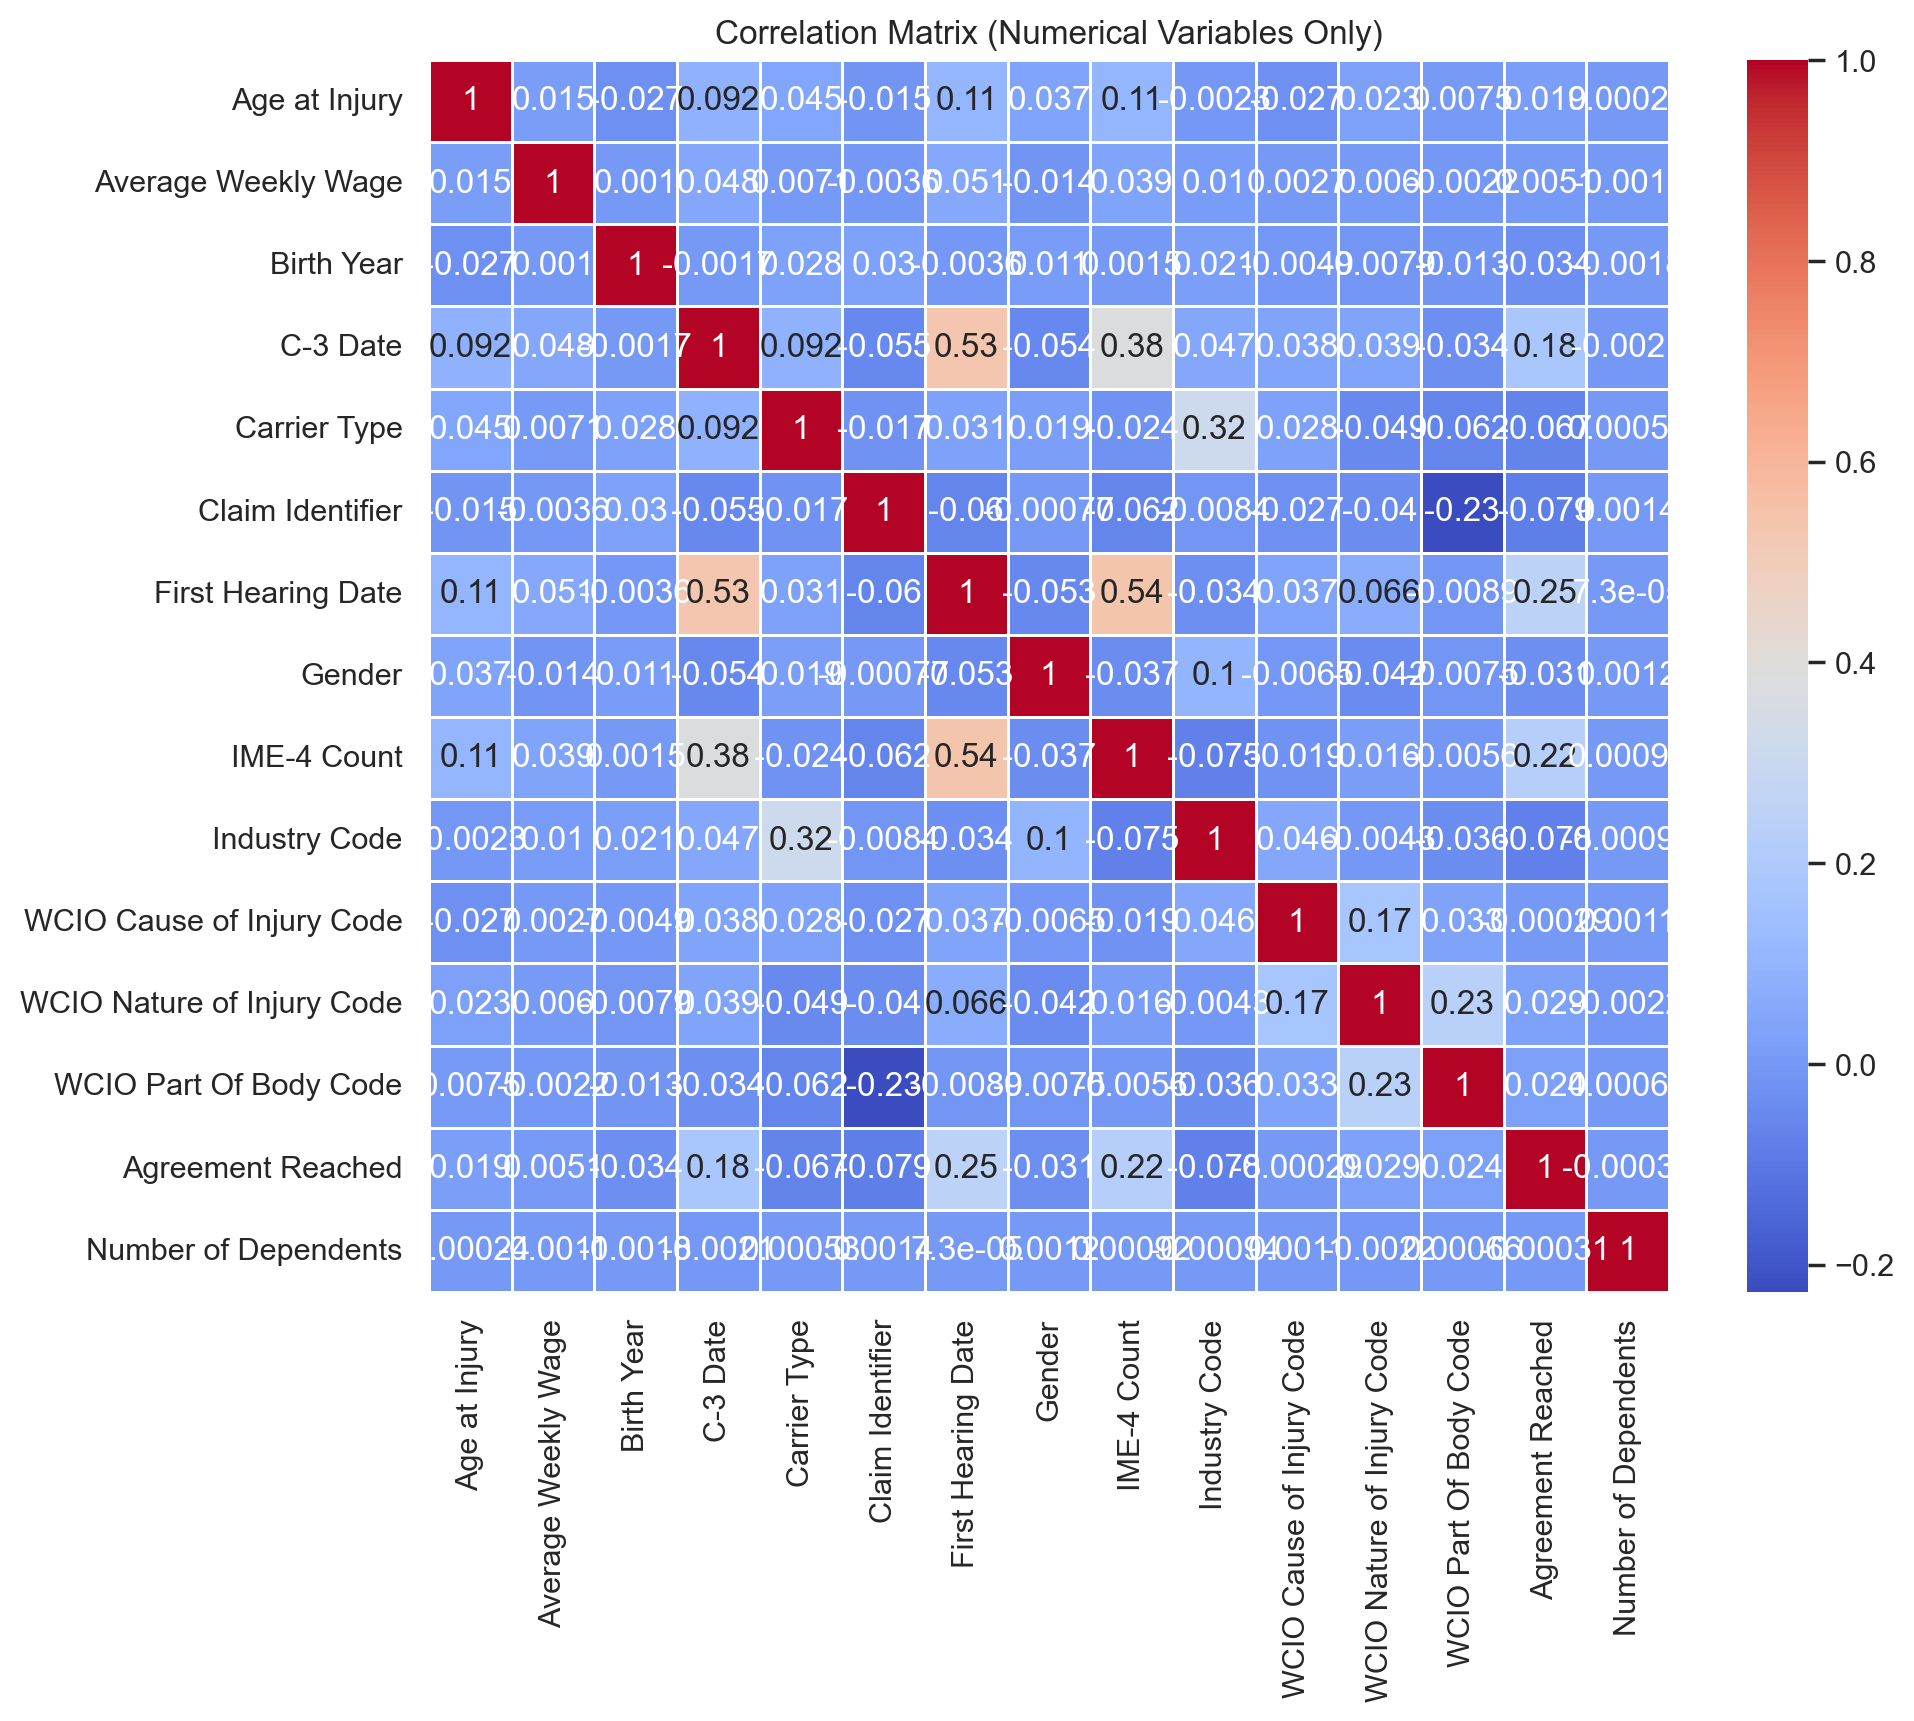

In [151]:
# Step 1: Select only numerical columns
numerical_df = wcb.select_dtypes(include='number')

# Step 2: Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Visualize the correlation matrix
plt.figure(figsize=(10, 8))  # Optional: Adjusts the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Display the plot
plt.title('Correlation Matrix (Numerical Variables Only)')
plt.show()

C:\Users\mainj\AppData\Local\Temp\ipykernel_11152\2285337936.py:16: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
C:\Users\mainj\AppData\Local\Temp\ipykernel_11152\2285337936.py:16: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
C:\Users\mainj\AppData\Local\Temp\ipykernel_11152\2285337936.py:16: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
C:\Users\mainj\AppData\Local\Temp\ipykernel_11152\2285337936.py:16: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
C:\Users\mainj\AppData\Local\Temp\ipykernel_11152\2285337936.py:16: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1)))
C:\Users\mainj\AppData\Local\Temp\ipykernel_11152\2285337936.py:16: RuntimeWarning: invalid value encountered in divide
  return np.sqrt(chi2 / (n * (min(r, k) - 1))

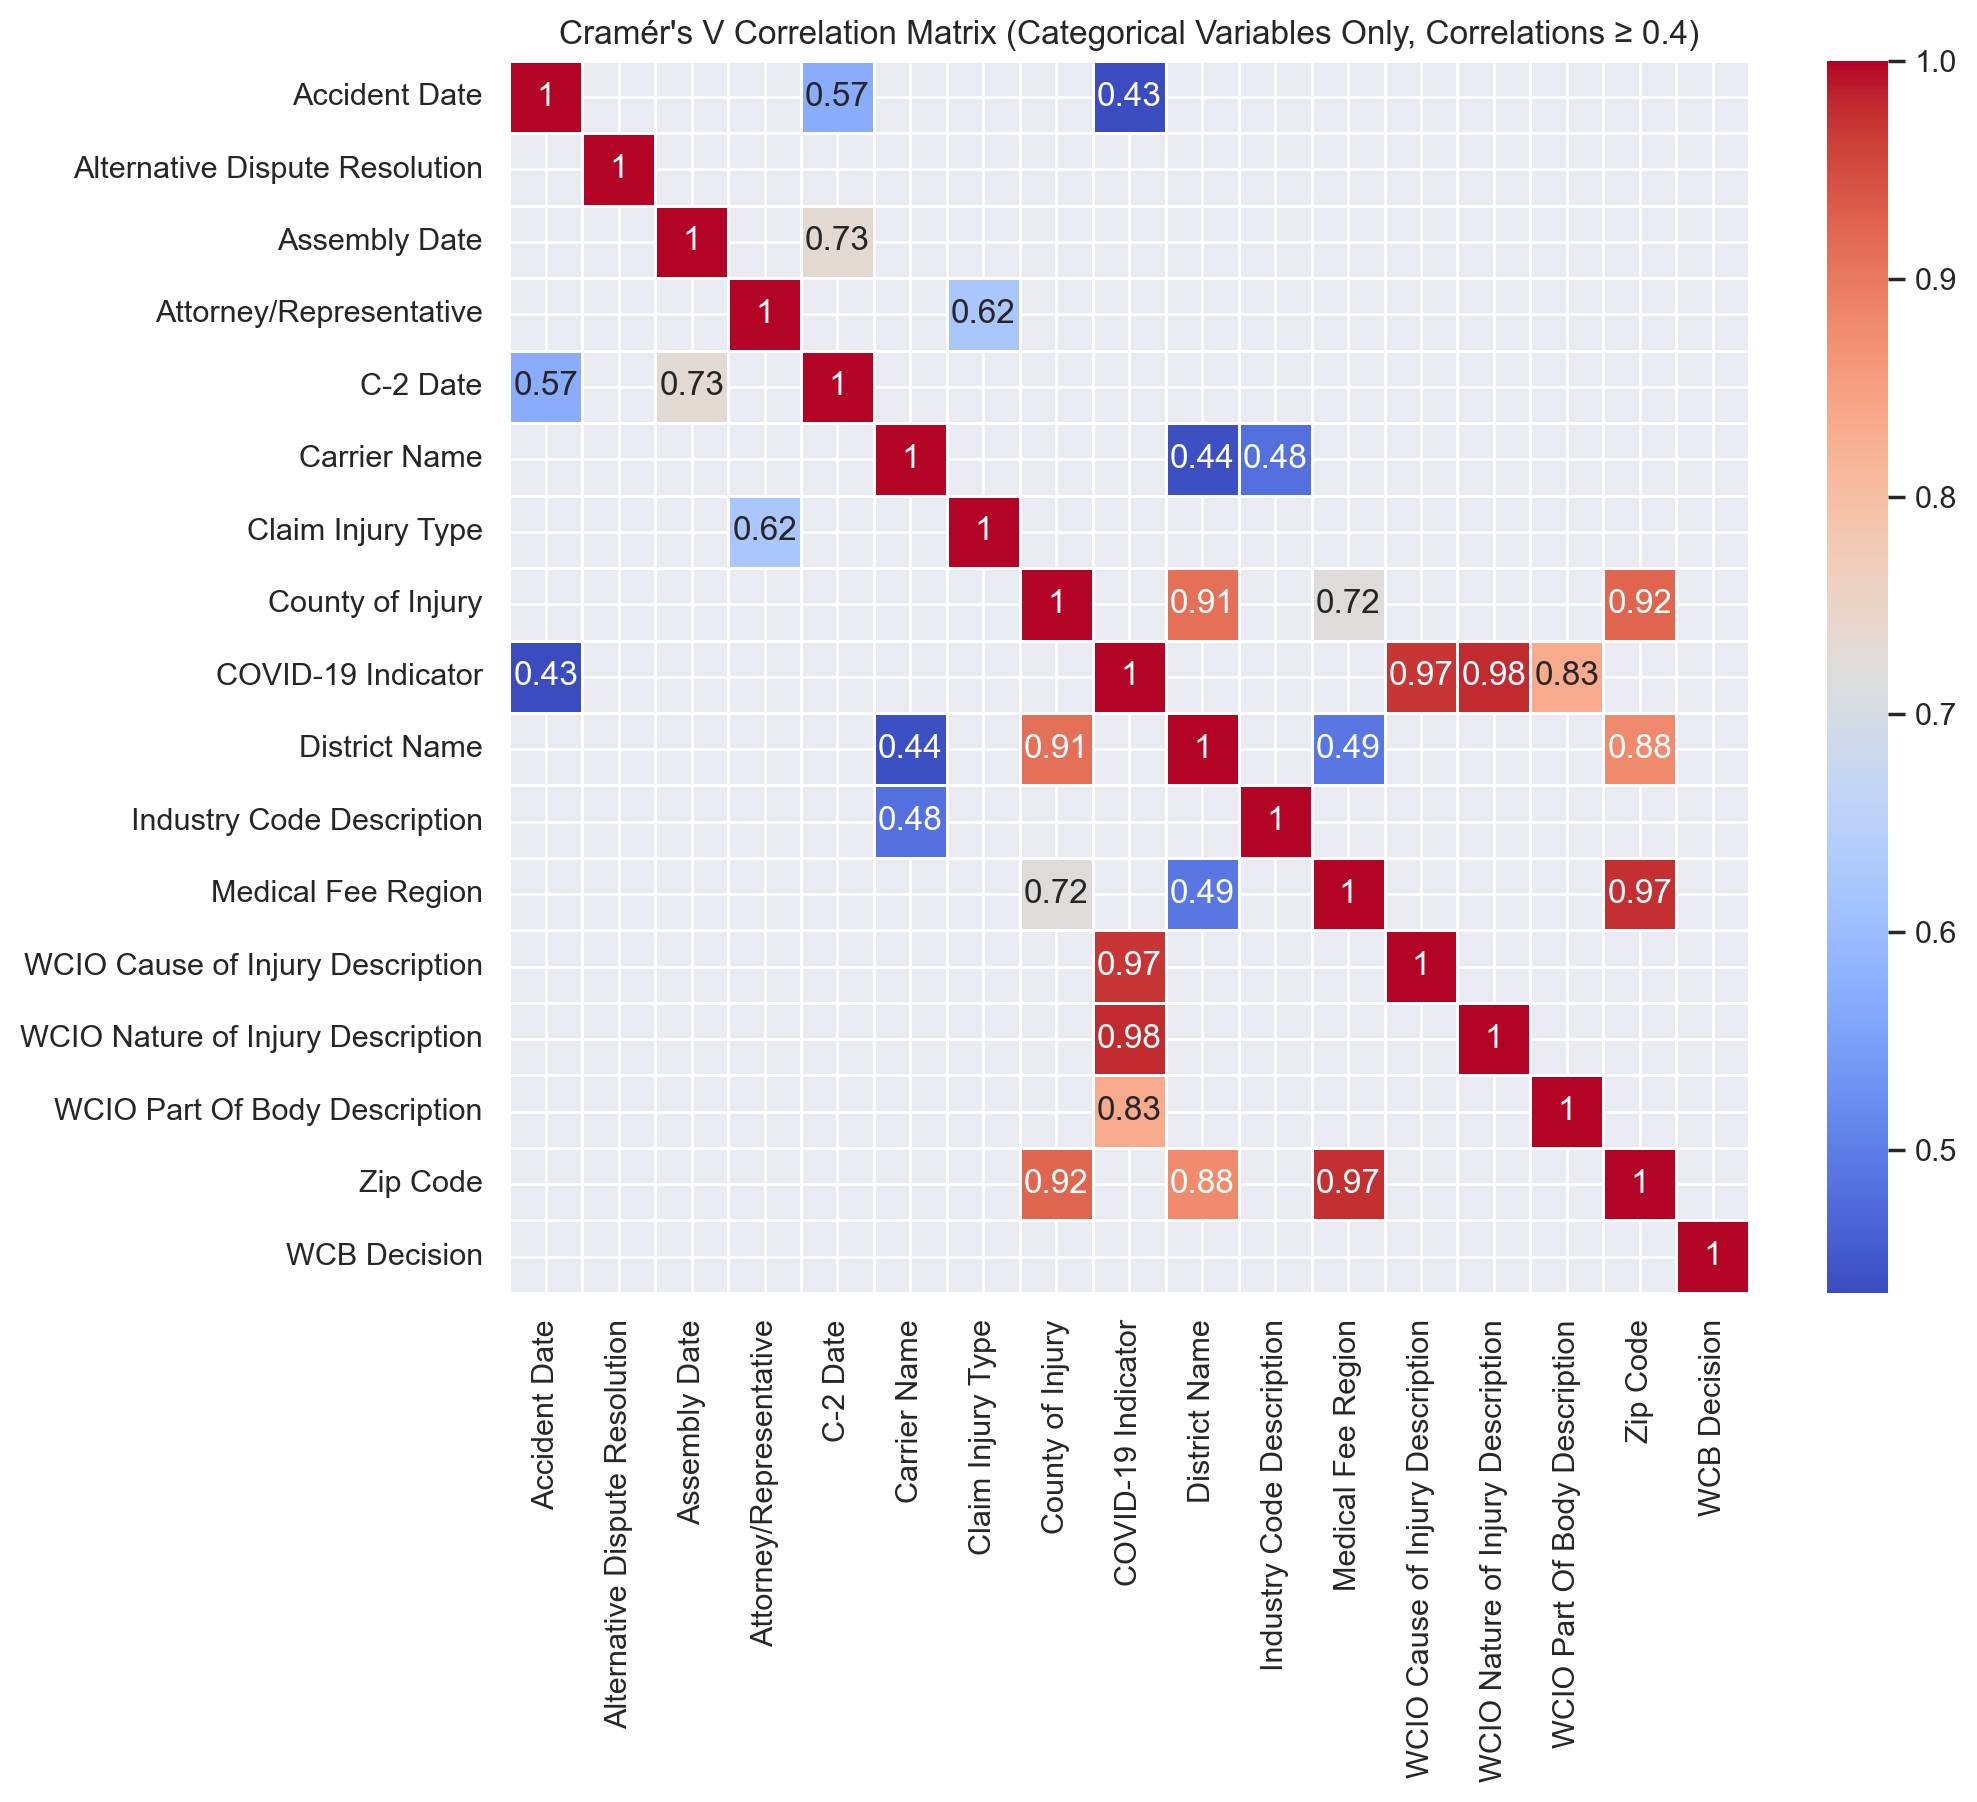

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Step 1: Select only categorical columns
categorical_df = wcb.select_dtypes(include=['object', 'datetime64[ns]'])

# Step 2: Define a function to calculate Cramér's V
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

# Step 3: Create an empty DataFrame to store Cramér's V values
cramers_v_matrix = pd.DataFrame(np.zeros((categorical_df.shape[1], categorical_df.shape[1])), 
                                columns=categorical_df.columns, 
                                index=categorical_df.columns)

# Step 4: Calculate Cramér's V for each pair of categorical variables
for col1 in categorical_df.columns:
    for col2 in categorical_df.columns:
        if col1 != col2:
            cramers_v_matrix.loc[col1, col2] = cramers_v(categorical_df[col1], categorical_df[col2])
        else:
            cramers_v_matrix.loc[col1, col2] = 1  # Set diagonal to 1

# Step 5: Apply a mask for values below 0.4
mask = (cramers_v_matrix > -0.4) & (cramers_v_matrix < 0.4)

# Step 6: Visualize the correlation matrix with masking
plt.figure(figsize=(10, 8))
sns.heatmap(cramers_v_matrix, annot=True, cmap='coolwarm', linewidths=0.5, mask=mask)

# Display the plot
plt.title('Cramér\'s V Correlation Matrix (Categorical Variables Only, Correlations ≥ 0.4)')
plt.show()



## 2.3 Outliers <a name="23-outliers"></a>

In [153]:
print(wcb['Age at Injury'].quantile(0.995))
print(wcb['Age at Injury'].quantile(0.005))

wcb['Age at Injury'] = wcb.apply(lambda x: 16 if 16 >= x['Age at Injury'] else x['Age at Injury'], axis=1)
wcb['Age at Injury'] = wcb.apply(lambda x: 85 if 85 <= x['Age at Injury'] else x['Age at Injury'], axis=1)

75.0
16.0


In [154]:
wcb['Birth Year'] = wcb['Accident Date'].dt.year - wcb['Age at Injury']

In [155]:
correlation_matrix = df.corr()

# Selecionar variáveis com correlação alta com o alvo (exemplo: acima de 0.3)
correlation_with_target = correlation_matrix['Claim Industry Type'].abs()
selected_features = correlation_with_target[correlation_with_target > 0.3].index.tolist()

NameError: name 'df' is not defined

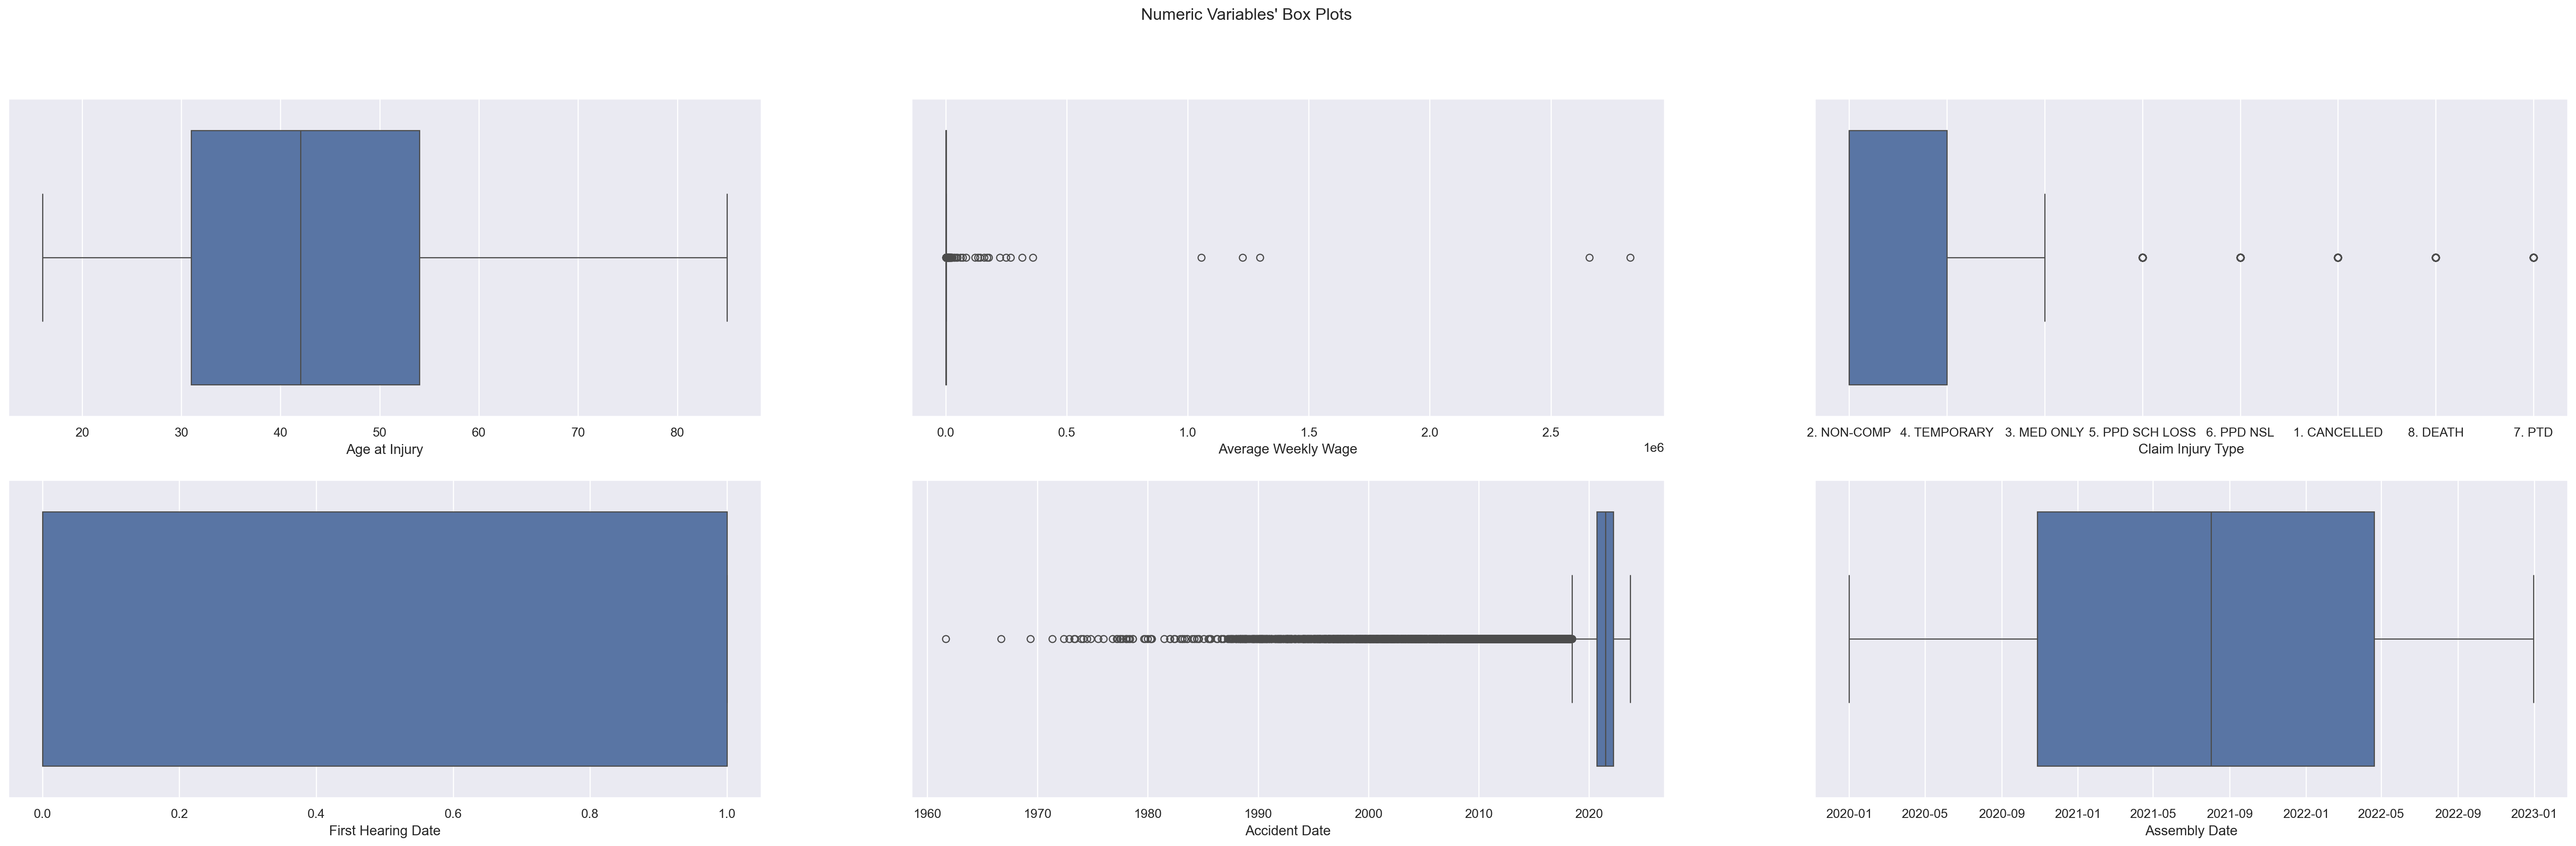

In [156]:
box_plot_features = ['Age at Injury', 'Average Weekly Wage', 'Claim Injury Type', 'First Hearing Date', 'Accident Date', 'Assembly Date']


sns.set()
fig, axes = plt.subplots(2, ceil(len(box_plot_features) / 2), figsize=(40, 11))
for ax, feat in zip(axes.flatten(), box_plot_features):
    sns.boxplot(x=wcb[feat], ax=ax)

title = "Numeric Variables' Box Plots"
plt.suptitle(title)
plt.show()

# REVER

In [157]:
wcb['Accident Date'].quantile(0.01)

Timestamp('2019-02-26 00:00:00')